# kNN算法的scikit-learn实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [4]:
# 设置k值
n_neighbors = 3

# 导入数据
iris = datasets.load_iris()
X = iris.data[:, :2]          # 只是用前两个特征
y = iris.target

X[0:10], y[0:10]

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6],
        [5.4, 3.9],
        [4.6, 3.4],
        [5. , 3.4],
        [4.4, 2.9],
        [4.9, 3.1]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

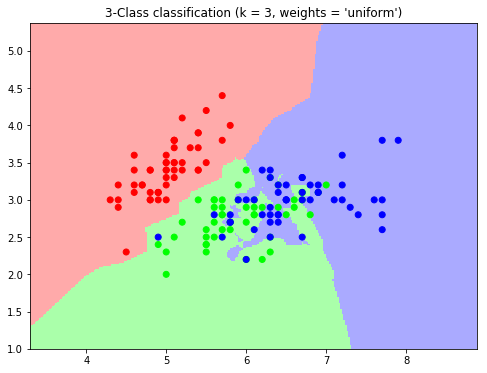

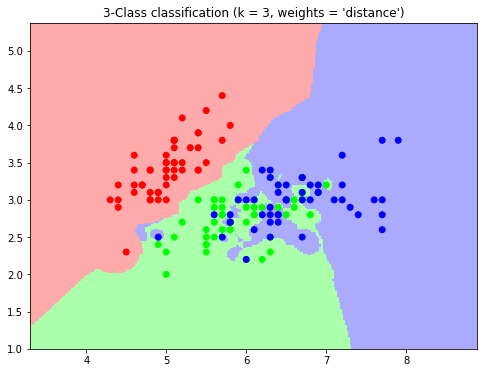

In [7]:
h = .02

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# uniform：所有的点在进西宁投票的时候具有平等的权利
# distance：距离所选点越近的点具有越大的权重
for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    
    # 绘制决策边界
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # 生成采样点
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.show()